## 4.1 Rank-1 tensor

In [3]:
import numpy as np

### Unfolding (matricization)
def unfold(X, mode_number):
    """
    Unfolding (matricization)

    Parameters
    ----------
    X : ndarray
        Input tensor.
    mode_number : int
        Mode number along which to unfold.
        ``numpy's axis = (mode_number - 1)``

    Returns
    -------
    Y : ndarray
        Unfolded (Matrixed) tensor.
    """
    axis = mode_number - 1     # numpy's axis = (mode_number - 1)
    N = np.ndim(X)             # order of input tensor
    L = np.size(X)             # total number of input tensor elements
    col_len = np.size(X, axis) # column Length of output matrix
    row_len = int(L / col_len) # row Length of output matrix
    ### mode (axis) transpose
    permute = [axis] + list(range(0, axis)) + list(range(axis+1, N))
    X_transposed = np.transpose(X, permute)
    ### unfolding 
    unfolding_shape = (col_len, row_len)
    Y = np.reshape(X_transposed, unfolding_shape)
    return Y

### Folding (tensorization)
def fold(Y, mode_number, shape):
    """
    Unfolding (matricization)

    Parameters
    ----------
    Y : ndarray
        Input matrix.
    mode_number : int
        Mode number along which to fold.
        ``numpy's axis = (mode_number - 1)``
    shape : tuple or list of ints
        shape of folding (tensorization).

    Returns
    -------
    X : ndarray
        Folded (tensorized) matrix.
    """
    axis = mode_number - 1 # numpy's axis = (mode_number - 1)
    N = len(shape)         # order of output tensor
    ### folding
    permute = [axis] + list(range(0, axis)) + list(range(axis+1, N))
    folding_shape = []
    for i in permute: folding_shape.append(shape[i])
    Y_folded = np.reshape(Y, folding_shape)
    ### mode (axis) transpose
    if mode_number==1: permute_inv = list(range(0, N))
    else: permute_inv = list(range(1, axis+1)) + [0] + list(range(axis+1, N))
    X = np.transpose(Y_folded, permute_inv)
    return X

### n-th mode product of Tensor and Matrix
def n_mode_prod_TandM(Tensor, Matrix, mode_number):
    """
    n-th mode product of Tensor and Matrix

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Matrix : ndarray
        Input matrix.
    mode_number : int
        Mode number to calculate the product.
        ``numpy's axis = (mode_number - 1)``

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    axis = mode_number - 1          # numpy's axis = (mode_number - 1)
    tensor_shape = np.shape(Tensor) # tensor's shape
    ### new tensor's shape
    new_tensor_shape = np.copy(tensor_shape)
    new_tensor_shape[axis] = np.size(Matrix, 0)
    ### unfolding
    Tensor_unfolded = unfold(Tensor, mode_number)
    ### Matrix product of Tensor and Matrix
    matrix_product_TandM = np.matmul(Matrix, Tensor_unfolded)
    ### Folding
    Y = fold(matrix_product_TandM, mode_number, new_tensor_shape)
    return Y

### all-mode product of Tensor and Matrix
def all_mode_prod_TandM(Tensor, Matrix_list):
    """
    All mode product of Tensor and Matrix

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Matrix_list : list ``[ndarray, ndarray, ndarray,...]``
        Input matrices list.

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    ### all-mode product of Tensor and Matrix
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        ### n-th mode product of Tensor and Matrix
        mode_number = axis + 1
        Y = n_mode_prod_TandM(Y, Matrix, mode_number)
    return Y

### 4.1.1 reconstruct of rank-1 tensor

In [6]:
### Reconstruct of rank-1 tensor
def recon_rank1_one_tensor(factor_vector_list):
    """
    Reconstruct of rank-1 tensor (outer product of factor vectors)

    Parameters
    ----------
    factor_vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input factor vectors list.

    Returns
    -------
    Tensor : ndarray
        Rank-1 tensor.
    """

    N = len(factor_vector_list) # total number of the factor vectors

    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    factor_matrix_list = []
    for vector in factor_vector_list: factor_matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))

    ### all-mode product of Tensor and Matrix
    ### (outer product of factor vectors)
    Tensor = all_mode_prod_TandM(np.ones([1]*N), factor_matrix_list)

    return Tensor

### Example
a_list = []
a_list.append(np.random.random((3)))
a_list.append(np.random.random((4)))
a_list.append(np.random.random((5)))
A = recon_rank1_one_tensor(a_list)
print("Reconstruct of rank-1 tensor")
print("``A = a1 o a2 o a3``")
for i, a in enumerate(a_list): print("factor vector a"+str(i+1)+" shape "+str(a.shape))
print("       Tensor  A shape "+str(A.shape))

Reconstruct of rank-1 tensor
``A = a1 o a2 o a3``
factor vector a1 shape (3,)
factor vector a2 shape (4,)
factor vector a3 shape (5,)
       Tensor  A shape (3, 4, 5)


### 4.1.2 Tensor-Vector all-mode product

In [7]:
### all-mode product of Tensor and Vector
def all_mode_prod_TandV(Tensor, Vector_list):
    """
    All mode product of Tensor and Vector

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input  vectors list.

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """

    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    Matrix_list = []
    for vector in Vector_list: Matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))

    ### all-mode product of Tensor and Vector
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        ### n-th mode product of Tensor and Matrix
        mode_number = axis + 1
        Y = n_mode_prod_TandM(Y, Matrix.T, mode_number)

    return Y

### Example
a_list = []
a_list.append(np.random.random((3)))
a_list.append(np.random.random((4)))
a_list.append(np.random.random((5)))
X = np.random.random((3, 4, 5))
Y = all_mode_prod_TandV(X, a_list)
print("All mode product of Tensor and Vector")
print("``Y = <X, a1 o a2 o a3>``")
print("       Tensor  X shape "+str(X.shape))
for i, a in enumerate(a_list): print("factor vector a"+str(i+1)+" shape "+str(a.shape))
print("       Tensor  Y shape "+str(Y.shape))

All mode product of Tensor and Vector
``Y = <X, a1 o a2 o a3>``
       Tensor  X shape (3, 4, 5)
factor vector a1 shape (3,)
factor vector a2 shape (4,)
factor vector a3 shape (5,)
       Tensor  Y shape (1, 1, 1)


### 4.1.3 Tensor-Vector leave-one-out product

In [13]:
### leave-one-out product of Tensor and Vector
def leave_one_out_prod_TandV(Tensor, Vector_list, mode_number_leave_one_out):
    """
    Leave-one-out product of Tensor and Vector

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input  vectors list.
    mode_number_leave_one_out : int
        mode number of leave one out

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """

    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    Matrix_list = []
    for vector in Vector_list: Matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))

    ### all-mode product of Tensor and Vector
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        mode_number = axis + 1
        ### leave one out
        if mode_number==mode_number_leave_one_out: continue
        ### n-th mode product of Tensor and Matrix
        Y = n_mode_prod_TandM(Y, Matrix.T, mode_number)

    return Y

### Example
mode_number_leave_one_out = 3
a_list = []
a_list.append(np.random.random((3)))
a_list.append(np.random.random((4)))
a_list.append(np.random.random((5)))
X = np.random.random((3, 4, 5))
Y = leave_one_out_prod_TandV(X, a_list, mode_number_leave_one_out)
print("Leave-one-out product of Tensor and Vector")
print("(leave-one-out is "+str(mode_number_leave_one_out)+"th-mode)")
print("       Tensor  X shape "+str(X.shape))
for i, a in enumerate(a_list): print("factor vector a"+str(i+1)+" shape "+str(a.shape))
print("       Tensor  Y shape "+str(Y.shape))

Leave-one-out product of Tensor and Vector
(leave-one-out is 3th-mode)
       Tensor  X shape (3, 4, 5)
factor vector a1 shape (3,)
factor vector a2 shape (4,)
factor vector a3 shape (5,)
       Tensor  Y shape (1, 1, 5)


### 4.1.4 Rank-1 decomposition

In [107]:
### rank-1 decomposition
def rank1_decomposition_als(Tensor, max_iter=30, initialize_type='ones'):
    """
    Rank-1 decomposition using ALS(altenating least squares)

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    max_iter : int
        Maximum number of update iterations.
    initialize_type : str
        Type of initialize factor vectors.

    Returns
    -------
    scale_cofficient : int
        Scale cofficient of the factor vectors.
    Vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Factor vectors.
    Tensor_reconst : ndarray
        Reconstructed Tensor.
    cost_history : ndarray
        Cost transition.
    """
    
    N = np.ndim(Tensor)             # order of input tensor
    tensor_shape = np.shape(Tensor) # tensor's shape

    ### initialize
    Vector_list = []
    if initialize_type=='ones': 
        for size in tensor_shape: Vector_list.append(np.ones((size)))
    if initialize_type=='random': 
        for size in tensor_shape: Vector_list.append(np.random.random((size)))

    cost = []
    for _ in range(max_iter):

        for axis, _ in enumerate(Vector_list):
            ### leave-one-out product of Tensor and Vector
            mode_number = axis + 1
            Y = leave_one_out_prod_TandV(Tensor, Vector_list, mode_number)
            ### vectorization
            y = np.reshape(Y, np.size(Y))
            ### normalize
            Vector_list[axis] = y / np.linalg.norm(y)

        ### scale coefficient
        lam = all_mode_prod_TandV(Tensor, Vector_list)
        ### tensor reconstruction
        Tensor_reconst = lam * recon_rank1_one_tensor(Vector_list)
        ### cost
        cost.append((np.linalg.norm(Tensor) - np.linalg.norm(Tensor_reconst))**2)

    scale_cofficient = np.reshape(lam, 1)
    cost_history = np.array(cost)

    return scale_cofficient, Vector_list, Tensor_reconst, cost_history

### Example
a_list = []
a_list.append(np.random.random((30)))
a_list.append(np.random.random((40)))
A = recon_rank1_one_tensor(a_list)
lam_hat, a_hat, A_hat, cost = rank1_decomposition_als(A)

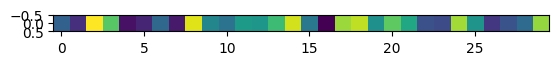

In [110]:
import matplotlib.pylab as plt

plt.imshow(a_list[0].reshape(1, -1))

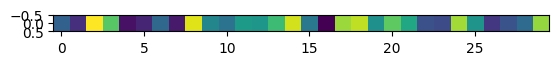

In [111]:
plt.imshow(a_hat[0].reshape(1, -1))